In [ ]:
# Install dependencies (kalau belum)
!pip install transformers wordcloud matplotlib seaborn

# === IMPORT LIBRARY ===
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification, AutoModelForSeq2SeqLM
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [ ]:
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForTokenClassification

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use c

=== SUMMARY ===
I've been travelling around the world for the past few weeks, and I've had some great experiences, including a visit to the Eiffel Tower, the World Cup finals in Indonesia and a trip to the UN climate summit in Geneva, as well as a few trips to Paris and London.

=== EMOTION DISTRIBUTION ===
['joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'anger', 'joy', 'joy']


<ipython-input-4-2c6b078408e5>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="Set2")


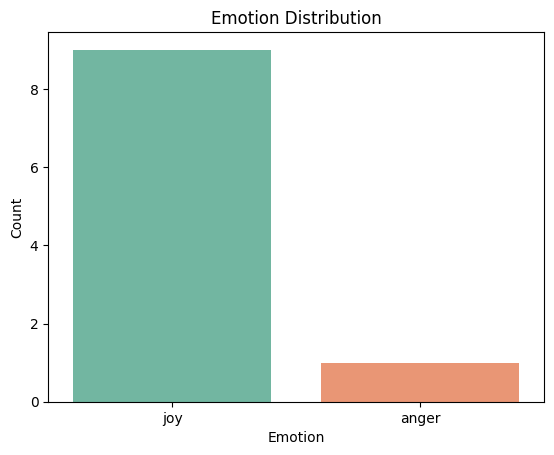


=== NAMED ENTITIES ===
['Susan Miller', 'Stanford University', 'AI', 'Tokyo', 'IBM Research', 'Berlin', 'Brandenburg Gate', 'Siemens', 'Angela Merkel', 'Germany', 'Sapiens', 'Yu', '##val Noah Harari', 'Barnes & Noble', 'San Francisco', 'Golden Gate Bridge', 'World Cup', 'Jakarta', 'Argentina', 'Lionel Messi', 'UN', 'Geneva', 'Greenpeace', 'World Health Organization', 'BBC News', 'Tesla', 'Palo Alto', 'Elon Musk', 'Eiff', '##el Tower', 'Paris', 'Lyon', 'Mon', '##et', 'Picasso', 'French', 'Le Meurice', 'No', '##am Chomsky', 'MIT', 'India', 'Brazil', 'Banff National Park', 'Canada', 'Airbn', 'Vancouver', 'Samantha', 'John', 'Blue Bottle', 'Brooklyn', 'New York', 'Public', 'Library']


<ipython-input-4-2c6b078408e5>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(values), palette="Blues_d")


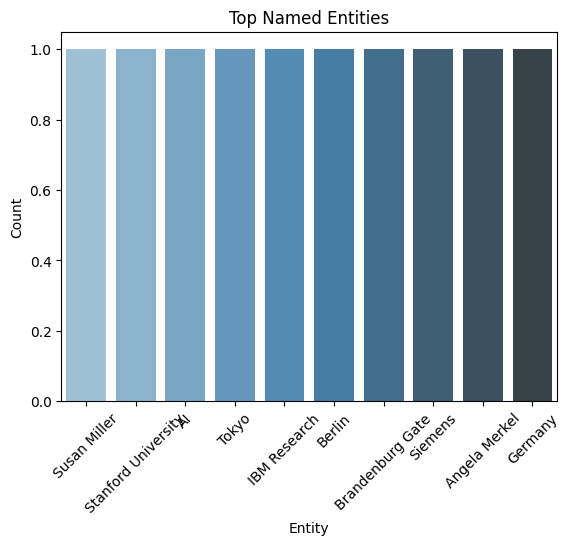


=== WORDCLOUD ===


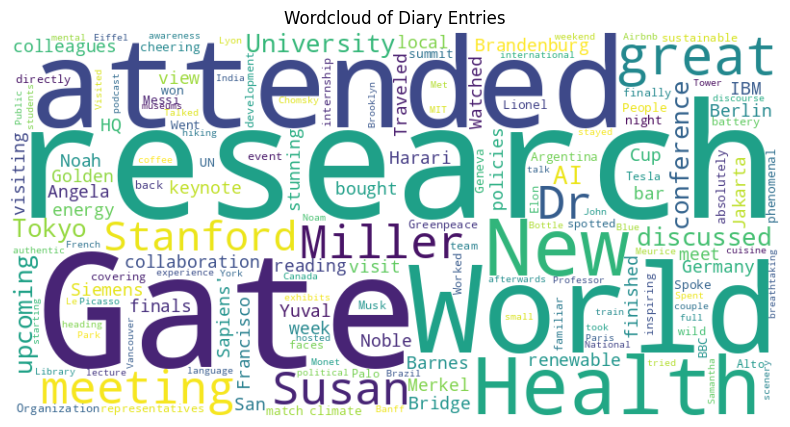

In [ ]:
# === ENTRY CONTOH ===
entries = [
    "Had a great meeting with Dr. Susan Miller at Stanford University. We discussed the upcoming AI conference in Tokyo and the research collaboration with IBM Research.",
    "Traveled to Berlin this week to visit the Brandenburg Gate and meet with colleagues at Siemens HQ. I also attended a keynote by Angela Merkel on renewable energy policies in Germany.",
    "Just finished reading 'Sapiens' by Yuval Noah Harari. I bought it at Barnes & Noble in San Francisco after visiting the Golden Gate Bridge. The view was stunning!",
    "Watched the World Cup finals at a local bar in Jakarta. Argentina won the match, and Lionel Messi was absolutely phenomenal. People were cheering all night.",
    "Went to the UN climate summit in Geneva. Spoke to representatives from Greenpeace and the World Health Organization. Also spotted some familiar faces from BBC News covering the event.",
    "I'm finally back from my internship at Tesla in Palo Alto. Worked directly under Elon Musk's team on sustainable battery development. What a wild and inspiring experience.",
    "Visited the Eiffel Tower in Paris and then took a train to Lyon. The museums were full of Monet and Picasso exhibits. I also tried authentic French cuisine at Le Meurice.",
    "Attended a lecture by Professor Noam Chomsky at MIT. The talk was about language and political discourse. Met a few international students from India and Brazil afterwards.",
    "Spent the weekend hiking in Banff National Park in Canada. I stayed at a small Airbnb hosted by a couple from Vancouver. The scenery was breathtaking!",
    "Had coffee with Samantha and John at Blue Bottle in Brooklyn before heading to the New York Public Library. Talked about starting a podcast on mental health awareness."
]


# === SUMMARIZATION ===
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

summarizer_tokenizer = AutoTokenizer.from_pretrained("suriya7/bart-finetuned-text-summarization")
summarizer_model = AutoModelForSeq2SeqLM.from_pretrained("suriya7/bart-finetuned-text-summarization")

def summarize_entries(entries):
    full_text = " ".join(entries)
    inputs = summarizer_tokenizer([full_text], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = summarizer_model.generate(inputs['input_ids'], max_new_tokens=100, do_sample=False)
    summary = summarizer_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# === EMOTION CLASSIFICATION ===
from transformers import pipeline

emotion_classifier = pipeline("text-classification",
                              model='bhadresh-savani/bert-base-uncased-emotion',
                              return_all_scores=True)

def classify_emotions(entries):
    emotion_results = []
    for entry in entries:
        result = emotion_classifier(entry)[0]
        top_emotion = max(result, key=lambda x: x['score'])
        emotion_results.append(top_emotion['label'])
    return emotion_results

# === NER ===
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

ner_tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
ner_model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

ner_pipeline = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer, aggregation_strategy="simple")

def extract_named_entities(entries):
    all_entities = []
    for entry in entries:
        result = ner_pipeline(entry)
        for ent in result:
            all_entities.append(ent['word'])
    return all_entities

# === WORDCLOUD ===
def generate_wordcloud(entries):
    combined_text = " ".join(entries)
    wc = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Wordcloud of Diary Entries")
    plt.show()

# === DISTRIBUSI EMOSI ===
def plot_emotion_distribution(emotions):
    counter = collections.Counter(emotions)
    labels = list(counter.keys())
    values = list(counter.values())

    sns.barplot(x=labels, y=values, palette="Set2")
    plt.title("Emotion Distribution")
    plt.ylabel("Count")
    plt.xlabel("Emotion")
    plt.show()

# === STATISTIK ENTITAS ===
def plot_named_entity_distribution(entities):
    if not entities:
        print("Tidak ada named entity yang terdeteksi.")
        return

    counter = collections.Counter(entities)
    top_entities = counter.most_common(10)
    labels, values = zip(*top_entities)

    sns.barplot(x=list(labels), y=list(values), palette="Blues_d")
    plt.title("Top Named Entities")
    plt.ylabel("Count")
    plt.xlabel("Entity")
    plt.xticks(rotation=45)
    plt.show()


# === PIPELINE EKSEKUSI ===
print("=== SUMMARY ===")
print(summarize_entries(entries))

print("\n=== EMOTION DISTRIBUTION ===")
emotions = classify_emotions(entries)
print(emotions)
plot_emotion_distribution(emotions)

print("\n=== NAMED ENTITIES ===")
entities = extract_named_entities(entries)
print(entities)
plot_named_entity_distribution(entities)

print("\n=== WORDCLOUD ===")
generate_wordcloud(entries)


# entry lebih  panjang

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use c

=== SUMMARY ===
I've been travelling around the world for the past few weeks, and I've had some great experiences, including a visit to the Eiffel Tower, the World Cup finals in Indonesia and a trip to the UN climate summit in Geneva, as well as a few trips to Paris and London.

=== EMOTION DISTRIBUTION ===
['joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'anger', 'joy', 'joy']


<ipython-input-6-ac4b6f58a2f2>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="Set2")


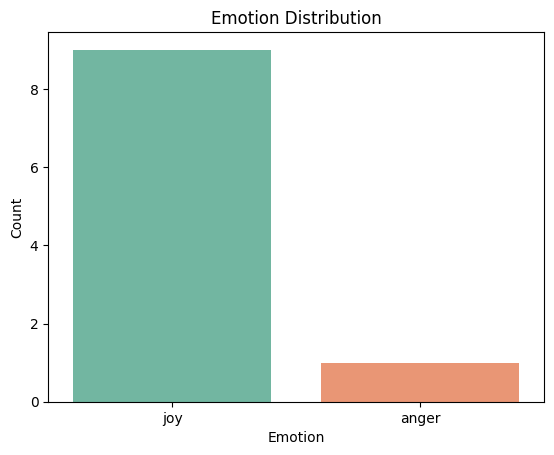


=== NAMED ENTITIES ===

PER Entities Found:
- ##am Chomsky
- ##val Noah Harari
- Angela Merkel
- John
- Lionel Messi
- Mon
- No
- Picasso
- Samantha
- Susan Miller
- Yu

ORG Entities Found:
- Airbn
- BBC News
- Barnes & Noble
- Blue Bottle
- Elon Musk
- Greenpeace
- IBM Research
- MIT
- Public
- Siemens
- Stanford University
- Tesla
- UN
- World Health Organization

MISC Entities Found:
- ##et
- AI
- French
- Sapiens
- World Cup

LOC Entities Found:
- ##el Tower
- Argentina
- Banff National Park
- Berlin
- Brandenburg Gate
- Brazil
- Brooklyn
- Canada
- Eiff
- Geneva
- Germany
- Golden Gate Bridge
- India
- Jakarta
- Le Meurice
- Library
- Lyon
- New York
- Palo Alto
- Paris
- San Francisco
- Tokyo
- Vancouver


<ipython-input-6-ac4b6f58a2f2>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="Set2")


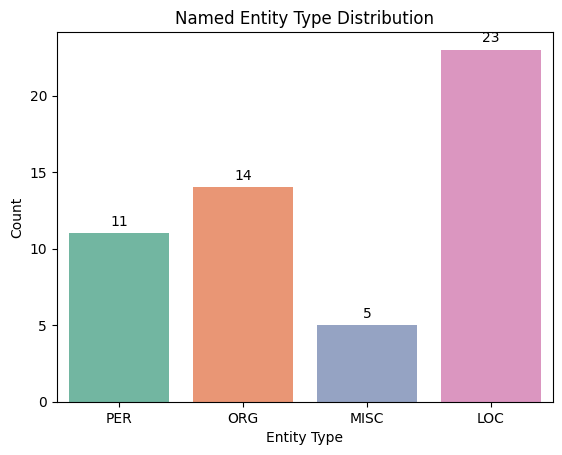


=== WORDCLOUD ===


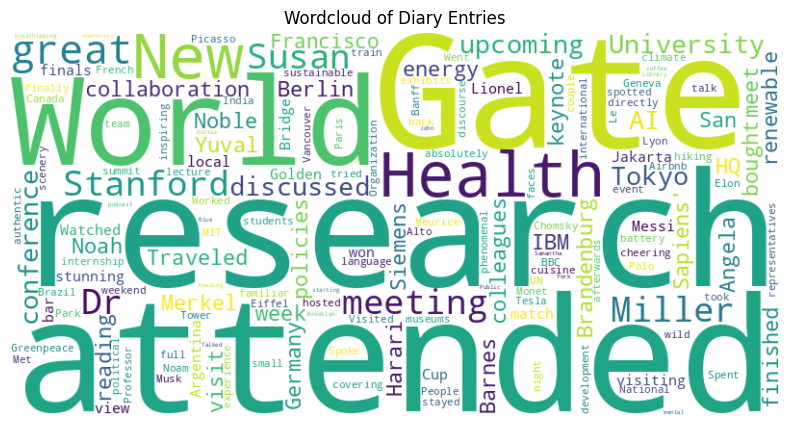

In [ ]:
# === ENTRY CONTOH ===
entries = [
    "Had a great meeting with Dr. Susan Miller at Stanford University. We discussed the upcoming AI conference in Tokyo and the research collaboration with IBM Research.",
    "Traveled to Berlin this week to visit the Brandenburg Gate and meet with colleagues at Siemens HQ. I also attended a keynote by Angela Merkel on renewable energy policies in Germany.",
    "Just finished reading 'Sapiens' by Yuval Noah Harari. I bought it at Barnes & Noble in San Francisco after visiting the Golden Gate Bridge. The view was stunning!",
    "Watched the World Cup finals at a local bar in Jakarta. Argentina won the match, and Lionel Messi was absolutely phenomenal. People were cheering all night.",
    "Went to the UN climate summit in Geneva. Spoke to representatives from Greenpeace and the World Health Organization. Also spotted some familiar faces from BBC News covering the event.",
    "I'm finally back from my internship at Tesla in Palo Alto. Worked directly under Elon Musk's team on sustainable battery development. What a wild and inspiring experience.",
    "Visited the Eiffel Tower in Paris and then took a train to Lyon. The museums were full of Monet and Picasso exhibits. I also tried authentic French cuisine at Le Meurice.",
    "Attended a lecture by Professor Noam Chomsky at MIT. The talk was about language and political discourse. Met a few international students from India and Brazil afterwards.",
    "Spent the weekend hiking in Banff National Park in Canada. I stayed at a small Airbnb hosted by a couple from Vancouver. The scenery was breathtaking!",
    "Had coffee with Samantha and John at Blue Bottle in Brooklyn before heading to the New York Public Library. Talked about starting a podcast on mental health awareness."
]

# === SUMMARIZATION ===
summarizer_tokenizer = AutoTokenizer.from_pretrained("suriya7/bart-finetuned-text-summarization")
summarizer_model = AutoModelForSeq2SeqLM.from_pretrained("suriya7/bart-finetuned-text-summarization")

def summarize_entries(entries):
    full_text = " ".join(entries)
    inputs = summarizer_tokenizer([full_text], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = summarizer_model.generate(inputs['input_ids'], max_new_tokens=100, do_sample=False)
    summary = summarizer_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# === EMOTION CLASSIFICATION ===
emotion_classifier = pipeline("text-classification",
                              model='bhadresh-savani/bert-base-uncased-emotion',
                              return_all_scores=True)

def classify_emotions(entries):
    emotion_results = []
    for entry in entries:
        result = emotion_classifier(entry)[0]
        top_emotion = max(result, key=lambda x: x['score'])
        emotion_results.append(top_emotion['label'])
    return emotion_results

# === NAMED ENTITY RECOGNITION (NER) ===
ner_tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
ner_model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

ner_pipeline = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer, aggregation_strategy="simple")

def extract_named_entities_by_class(entries):
    entity_dict = {}
    for entry in entries:
        results = ner_pipeline(entry)
        for ent in results:
            label = ent['entity_group']
            word = ent['word']
            if label not in entity_dict:
                entity_dict[label] = []
            entity_dict[label].append(word)
    return entity_dict

def print_named_entities(entity_dict):
    for label, words in entity_dict.items():
        print(f"\n{label.upper()} Entities Found:")
        for w in sorted(set(words)):
            print(f"- {w}")

def plot_named_entity_distribution(entity_dict):
    if not entity_dict:
        print("No named entities found.")
        return
    labels = list(entity_dict.keys())
    counts = [len(entity_dict[label]) for label in labels]

    sns.barplot(x=labels, y=counts, palette="Set2")
    plt.title("Named Entity Type Distribution")
    plt.ylabel("Count")
    plt.xlabel("Entity Type")

    for i, count in enumerate(counts):
        plt.text(i, count + 0.3, str(count), ha='center', va='bottom')

    plt.show()

# === WORDCLOUD ===
def generate_wordcloud(entries):
    combined_text = " ".join(entries)
    wc = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Wordcloud of Diary Entries")
    plt.show()

# === DISTRIBUSI EMOSI ===
def plot_emotion_distribution(emotions):
    counter = collections.Counter(emotions)
    labels = list(counter.keys())
    values = list(counter.values())

    sns.barplot(x=labels, y=values, palette="Set2")
    plt.title("Emotion Distribution")
    plt.ylabel("Count")
    plt.xlabel("Emotion")
    plt.show()

# === EKSEKUSI PIPELINE ===
print("=== SUMMARY ===")
print(summarize_entries(entries))

print("\n=== EMOTION DISTRIBUTION ===")
emotions = classify_emotions(entries)
print(emotions)
plot_emotion_distribution(emotions)

print("\n=== NAMED ENTITIES ===")
entity_dict = extract_named_entities_by_class(entries)
print_named_entities(entity_dict)
plot_named_entity_distribution(entity_dict)

print("\n=== WORDCLOUD ===")
generate_wordcloud(entries)